# Author: Kumar R.

# Project: 

The project is to classify whether the person is wearing mask or not. I have used custom CNN architecture to train my model with my own custom image data set of people wearing mask and without mask.

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator 

In [3]:
#It is applicable only if the model is trained in google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#Load the optimizer
from tensorflow.keras.optimizers import RMSprop

In [5]:
!pip install -q keras

In [6]:
#Data augumentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=36,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)                      

In [7]:
#Read the training and test data location
train_data = '/content/drive/MyDrive/Colab Notebooks/FaceMask/train'
test_data = '/content/drive/MyDrive/Colab Notebooks/FaceMask/test'

In [8]:
#create a train and test datasets to train and test the model
train = train_datagen.flow_from_directory(train_data,
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='binary')

test = test_datagen.flow_from_directory(test_data,
                                        target_size=(150,150),
                                        batch_size=16,
                                        class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [9]:
#Model Building

model = tf.keras.models.Sequential()
#Input layer
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
#Hidden Convolutional layers
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

#Flatten layer to ravel the features extracted from CNN architecture
model.add(tf.keras.layers.Flatten())


In [10]:
#Creating a dense layers (ANN)
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [11]:
#model compilation
model.compile(optimizer='RMSprop', loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
#Training the model using RMSProp optimizer
hist = model.fit(train, validation_data=test, epochs=25, steps_per_epoch= 82, validation_steps=12, verbose=True)

Epoch 1/25
82/82 [==============================] - 448s 5s/step - loss: 0.5101 - accuracy: 0.7565 - val_loss: 0.4422 - val_accuracy: 0.8021
Epoch 2/25
82/82 [==============================] - 13s 161ms/step - loss: 0.2593 - accuracy: 0.9006 - val_loss: 0.1282 - val_accuracy: 0.9479
Epoch 3/25
82/82 [==============================] - 13s 163ms/step - loss: 0.2267 - accuracy: 0.9145 - val_loss: 0.1360 - val_accuracy: 0.9531
Epoch 4/25
82/82 [==============================] - 13s 162ms/step - loss: 0.1828 - accuracy: 0.9330 - val_loss: 0.5064 - val_accuracy: 0.8125
Epoch 5/25
82/82 [==============================] - 13s 162ms/step - loss: 0.1697 - accuracy: 0.9430 - val_loss: 0.2249 - val_accuracy: 0.8906
Epoch 6/25
82/82 [==============================] - 13s 163ms/step - loss: 0.1551 - accuracy: 0.9384 - val_loss: 0.1184 - val_accuracy: 0.9427
Epoch 7/25
82/82 [==============================] - 13s 163ms/step - loss: 0.1577 - accuracy: 0.9368 - val_loss: 0.1937 - val_accuracy: 0.9531
E

Text(0.5, 1.0, 'Accurcy curve - RMSProp')

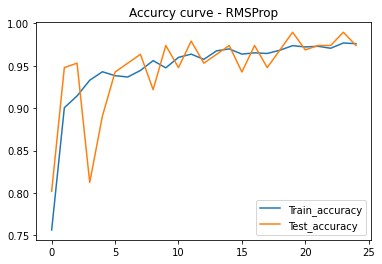

In [13]:
#Visualization of the model
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train_accuracy','Test_accuracy'])
plt.title("Accurcy curve - RMSProp")

In [14]:
#Model Building

model = tf.keras.models.Sequential()
#Input layer
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

#Hidden layer with Two Convolutional layers before MaxPooling
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

#Flattening the features
model.add(tf.keras.layers.Flatten())
#Adding the dense layer(ANN)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.Dense(50, activation='relu'))
#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [15]:
#Commpilation of the model using the same optimizer (RMSProp)
model.compile(optimizer='RMSprop', loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
#Training the new model
histo = model.fit(train, validation_data=test, epochs=18, steps_per_epoch= 82, validation_steps=12, verbose=True)

Epoch 1/18
82/82 [==============================] - 15s 165ms/step - loss: 0.7034 - accuracy: 0.7003 - val_loss: 0.3230 - val_accuracy: 0.8906
Epoch 2/18
82/82 [==============================] - 13s 161ms/step - loss: 0.3052 - accuracy: 0.9006 - val_loss: 0.1745 - val_accuracy: 0.9583
Epoch 3/18
82/82 [==============================] - 13s 160ms/step - loss: 0.2098 - accuracy: 0.9214 - val_loss: 0.1377 - val_accuracy: 0.9427
Epoch 4/18
82/82 [==============================] - 13s 160ms/step - loss: 0.2092 - accuracy: 0.9260 - val_loss: 0.0960 - val_accuracy: 0.9583
Epoch 5/18
82/82 [==============================] - 13s 161ms/step - loss: 0.1660 - accuracy: 0.9353 - val_loss: 0.1119 - val_accuracy: 0.9688
Epoch 6/18
82/82 [==============================] - 13s 162ms/step - loss: 0.1773 - accuracy: 0.9476 - val_loss: 0.2361 - val_accuracy: 0.9531
Epoch 7/18
82/82 [==============================] - 13s 164ms/step - loss: 0.1225 - accuracy: 0.9584 - val_loss: 0.1165 - val_accuracy: 0.9635

Text(0.5, 1.0, 'RMSProp Accuracy')

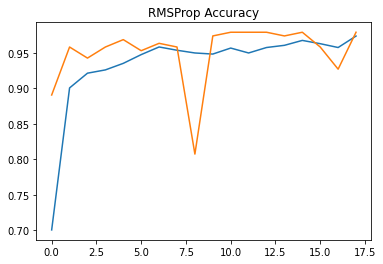

In [17]:
#Visualization of the model performance
import matplotlib.pyplot as plt
plt.plot(histo.history['accuracy'])
plt.plot(histo.history['val_accuracy'])
plt.title("RMSProp Accuracy")

The above model is performing better than the previous one. Therefore, I am training the same model again with another Optimizer called "ADAM".

## Training the same model using another optimizer "Adam".

In [19]:
#Import the Optimizer "Adam".
from keras.optimizers import Adam

In [20]:
#Model Building

model = tf.keras.models.Sequential()
#Input layer
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
#CNN layers
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
#Flattening
model.add(tf.keras.layers.Flatten())
#Dense layers
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.Dense(50, activation='relu'))
#output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [21]:
#Model compilation
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
#Training the model witht ADAM Optimizer
histor = model.fit(train, validation_data=test, epochs=23, steps_per_epoch= 82, validation_steps=12, verbose=True)

Epoch 1/23
82/82 [==============================] - 14s 162ms/step - loss: 0.4176 - accuracy: 0.7966 - val_loss: 0.1948 - val_accuracy: 0.9323
Epoch 2/23
82/82 [==============================] - 13s 164ms/step - loss: 0.1874 - accuracy: 0.9307 - val_loss: 0.1256 - val_accuracy: 0.9583
Epoch 3/23
82/82 [==============================] - 13s 160ms/step - loss: 0.2416 - accuracy: 0.9068 - val_loss: 0.1666 - val_accuracy: 0.9583
Epoch 4/23
82/82 [==============================] - 13s 161ms/step - loss: 0.1867 - accuracy: 0.9307 - val_loss: 0.1241 - val_accuracy: 0.9635
Epoch 5/23
82/82 [==============================] - 13s 160ms/step - loss: 0.1276 - accuracy: 0.9515 - val_loss: 0.1149 - val_accuracy: 0.9635
Epoch 6/23
82/82 [==============================] - 13s 161ms/step - loss: 0.1178 - accuracy: 0.9538 - val_loss: 0.1188 - val_accuracy: 0.9740
Epoch 7/23
82/82 [==============================] - 13s 158ms/step - loss: 0.0994 - accuracy: 0.9653 - val_loss: 0.1688 - val_accuracy: 0.9688

Text(0.5, 1.0, 'Adam Accuracy')

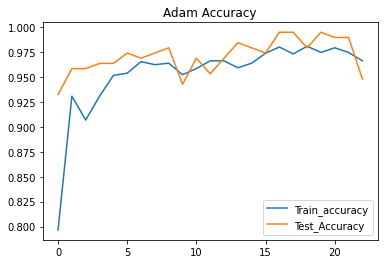

In [23]:
#Visualizing the accuracy of the model
import matplotlib.pyplot as plt
plt.plot(histor.history['accuracy'])
plt.plot(histor.history['val_accuracy'])
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.title("Adam Accuracy")

Since the adam is performing better with 99.48% test accuracy, there are high chances that it would give 100% test accuracy if I can increase the number of epochs.

Also, I am using Early Stopping callbacks method to stop training the model when it gives the required accuracy.

In [29]:
#Defining the Early stopping method
class mythreshold(tf.keras.callbacks.Callback):
  def __init__(self, cl):
    super(mythreshold, self).__init__()
    self.cl = cl

  def on_epoch_end(self, epoch, logs=None):
    train_score = logs['accuracy']
    test_score = logs['val_accuracy']

    if (test_score>train_score and test_score>self.cl) or test_score==1:
      self.model.stop_training=True


In [30]:
#Calling the Early stopping method
Earli_stop = mythreshold(cl=1.0) #here I have given threshold 100%. 

#Training the model with early stopping method.
history = model.fit(train, validation_data=test, epochs=150, steps_per_epoch= 82, validation_steps=12, verbose=True, callbacks=[Earli_stop])

Epoch 1/150
82/82 [==============================] - 13s 161ms/step - loss: 0.0174 - accuracy: 0.9931 - val_loss: 0.0305 - val_accuracy: 0.9844
Epoch 2/150
82/82 [==============================] - 13s 161ms/step - loss: 0.0213 - accuracy: 0.9923 - val_loss: 0.0524 - val_accuracy: 0.9844
Epoch 3/150
82/82 [==============================] - 13s 161ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.1098 - val_accuracy: 0.9688
Epoch 4/150
82/82 [==============================] - 13s 160ms/step - loss: 0.0236 - accuracy: 0.9938 - val_loss: 0.0371 - val_accuracy: 0.9896
Epoch 5/150
82/82 [==============================] - 13s 160ms/step - loss: 0.0282 - accuracy: 0.9931 - val_loss: 0.1063 - val_accuracy: 0.9844
Epoch 6/150
82/82 [==============================] - 13s 159ms/step - loss: 0.0128 - accuracy: 0.9946 - val_loss: 0.0462 - val_accuracy: 0.9792
Epoch 7/150
82/82 [==============================] - 13s 161ms/step - loss: 0.0088 - accuracy: 0.9961 - val_loss: 0.0306 - val_accuracy:

Text(0.5, 1.0, 'Adam Accuracy')

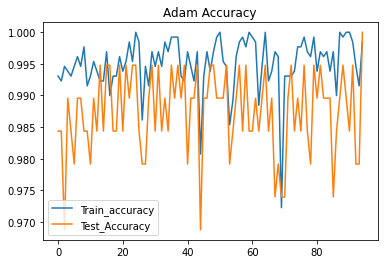

In [31]:
#Visualizing the performance
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.title("Adam Accuracy")

#### The above trained model gave a generalized model with test accuracy of 100% and train accuracy of 99.85%. Therefore, I will save the this as a final model.

In [32]:
#Save the model for tensorflow 2.0 version.
model.save("Face_Mask.tf")

INFO:tensorflow:Assets written to: Face_Mask.tf/assets


In [33]:
#Save the model for tensorflow 1 version.
model.save("Facemask_.h5")

## Prediction stage

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Library ot load the model
from keras.models import load_model

In [3]:
from keras.preprocessing import image 

In [4]:
#Loading the saved model as mymodel
mymodel = load_model('Facemask_.h5')

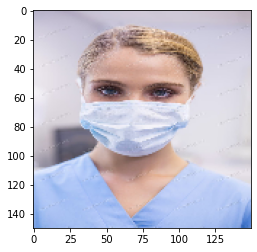

In [5]:
#Loading the image with target size (150,150)
ima = image.load_img('newimage.jpg', target_size=(150,150))
#Visualization of the image
plt.imshow(ima)
plt.show()

In [6]:
import warnings
warnings.filterwarnings('ignore')
#Converting an image to array
ima = image.array_to_img(ima)
#Expanding the m=dimensions
imag = np.expand_dims(ima, axis=0)
#Preddicting the output
pred = mymodel.predict_classes(imag)
#If condition
if pred[0][0] ==0:
    print('With mask')
else:
    print("Without mask")


With mask


### Prediction of Live Images

In [1]:
#Import openCV
import cv2
import datetime
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
mymodel = load_model('Facemask_.h5')

In [2]:
#Enable camera
camera = cv2.VideoCapture(0)
#loading the Haar Cascade Classifier Model to detect the face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while (True):
    _,img = camera.read()
    face = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)
    for (x,y,w,h) in face:
        face_img = img[x:x+w, y:y+h]
        cv2.imwrite('temp.jpg', face_img)
        
        #Load image saved using cv2
        test_img = image.load_img('temp.jpg', target_size=(150,150,3))
        test_img = image.img_to_array(test_img)
        test_img = np.expand_dims(test_img, axis=0)
        predicte = mymodel.predict_classes(test_img)
        
        #If condition to determine the class
        if predicte[0][0]==0:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'With Mask',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        else:
            cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w//2,y+h+20)), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        #datetim = str(datetime.datetime.now())
        #cv2.putText(img,datetim,(400,450),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),3)
        
    cv2.imshow('img',img)
        
        #Terminaton condition
    if cv2.waitKey(1) & 0xFF==ord('q'): #Press q to exit
        break
            
#Clean up resources
camera.release()
cv2.destroyAllWindows()

C:\Users\Kumar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
kumarnaidur17@gmail.com